# Mukh O Mukhosh, the face mask detector

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import os

## dataset read/transform/prepocessing

In [2]:
root_path = "./data"

In [3]:
train_data_path = os.path.join(root_path, "train")
val_data_path = os.path.join(root_path, "val")

In [4]:
print(train_data_path)
print(val_data_path)

./data/train
./data/val


In [5]:
transform = transforms.Compose([
    transforms.RandomResizedCrop(250),
    transforms.ToTensor()
])

In [6]:
train_data = datasets.ImageFolder(train_data_path, transform)
val_data = datasets.ImageFolder(val_data_path, transform)

In [7]:
print(train_data)
print(val_data)

Dataset ImageFolder
    Number of datapoints: 1314
    Root location: ./data/train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(250, 250), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )
Dataset ImageFolder
    Number of datapoints: 142
    Root location: ./data/val
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(250, 250), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )


In [8]:
train_data.classes

['with_mask', 'without_mask']

In [9]:
train_data.class_to_idx

{'with_mask': 0, 'without_mask': 1}

In [10]:
train_data.imgs

[('./data/train/with_mask/-110603108-gettyimages-533567012.jpg', 0),
 ('./data/train/with_mask/-110695084-mask2.jpg', 0),
 ('./data/train/with_mask/0-with-mask.jpg', 0),
 ('./data/train/with_mask/0000305-62360-halyard-health-pfr-p3-respirator-face-mask-ffp.jpeg',
  0),
 ('./data/train/with_mask/0000444-48296-halyard-health-surgical-mask-teddy-bear-print.jpeg',
  0),
 ('./data/train/with_mask/007563.jpg', 0),
 ('./data/train/with_mask/0779db20580fc7b054ad6b1b7bd9fb35.jpeg', 0),
 ('./data/train/with_mask/1-respirator-mask.jpg', 0),
 ('./data/train/with_mask/10-with-mask.jpg', 0),
 ('./data/train/with_mask/100-with-mask.jpg', 0),
 ('./data/train/with_mask/101-with-mask.jpg', 0),
 ('./data/train/with_mask/103-with-mask.jpg', 0),
 ('./data/train/with_mask/104-with-mask.jpg', 0),
 ('./data/train/with_mask/105-with-mask.jpg', 0),
 ('./data/train/with_mask/106.jpg', 0),
 ('./data/train/with_mask/107-with-mask.jpg', 0),
 ('./data/train/with_mask/108-with-mask.jpg', 0),
 ('./data/train/with_mask

## train image dimension analysis using Pandas

In [11]:
df = pd.DataFrame(train_data.imgs)

In [12]:
df.head()

,0,1
0,./data/train/with_mask/-110603108-gettyimages-...,0
1,./data/train/with_mask/-110695084-mask2.jpg,0
2,./data/train/with_mask/0-with-mask.jpg,0
3,./data/train/with_mask/0000305-62360-halyard-h...,0
4,./data/train/with_mask/0000444-48296-halyard-h...,0


In [13]:
df[0].describe()

count                                         1314
unique                                        1314
top       ./data/train/with_mask/349-with-mask.jpg
freq                                             1
Name: 0, dtype: object

In [14]:
def image_size(img):
    with Image.open(img) as im:
        return im.size

img_sizes = [image_size(img[0]) for img in train_data.imgs]

In [15]:
img_sizes

[(410, 230),
 (976, 549),
 (525, 350),
 (320, 320),
 (1500, 1500),
 (1360, 1360),
 (1279, 720),
 (267, 400),
 (233, 350),
 (320, 428),
 (320, 428),
 (320, 428),
 (324, 341),
 (214, 244),
 (348, 480),
 (320, 433),
 (320, 428),
 (296, 374),
 (640, 640),
 (266, 344),
 (320, 428),
 (320, 428),
 (300, 300),
 (320, 428),
 (295, 400),
 (320, 428),
 (622, 350),
 (320, 428),
 (320, 428),
 (320, 428),
 (320, 428),
 (327, 433),
 (320, 433),
 (312, 351),
 (320, 428),
 (524, 350),
 (340, 417),
 (720, 540),
 (320, 428),
 (320, 428),
 (320, 428),
 (285, 372),
 (259, 194),
 (956, 960),
 (320, 428),
 (184, 274),
 (320, 428),
 (238, 212),
 (320, 428),
 (173, 221),
 (320, 428),
 (467, 350),
 (414, 534),
 (273, 400),
 (205, 246),
 (195, 259),
 (226, 250),
 (206, 244),
 (260, 194),
 (320, 433),
 (201, 289),
 (332, 432),
 (188, 283),
 (320, 433),
 (320, 433),
 (225, 240),
 (257, 196),
 (603, 350),
 (203, 248),
 (318, 442),
 (259, 194),
 (203, 233),
 (225, 225),
 (320, 428),
 (296, 170),
 (189, 267),
 (341, 

In [16]:
df_image_sizes = pd.DataFrame(img_sizes)

In [17]:
df_image_sizes

,0,1
0,410,230
1,976,549
2,525,350
3,320,320
4,1500,1500
...,...,...
1309,2448,3264
1310,550,750
1311,970,1200
1312,600,450


In [18]:
df_image_sizes[0].describe()

count    1314.000000
mean      397.927702
std       326.431366
min       110.000000
25%       260.000000
50%       320.000000
75%       349.750000
max      3456.000000
Name: 0, dtype: float64

## data loader

In [19]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
val_loader = DataLoader(val_data, batch_size=142, shuffle=True)

## convolutional model

In [20]:
class FaceMaskDetectorModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(61*61*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,2)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 61*61*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [21]:
torch.manual_seed(42)
model = FaceMaskDetectorModel()
model

FaceMaskDetectorModel(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=59536, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

## loss function & optimizer

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## training

In [23]:
'''for b, (x_train, y_train) in enumerate(train_loader):
    print("b", b)
    print("x_train", x_train.shape)
    print("y_train", y_train.shape)
    break'''

'for b, (x_train, y_train) in enumerate(train_loader):\n    print("b", b)\n    print("x_train", x_train.shape)\n    print("y_train", y_train.shape)\n    break'

In [24]:
import time
start_time = time.time()

epochs = 15
train_losses = []
val_losses = []
train_correct = []
val_correct = []

for i in range(epochs):
    trn_total = 0
    trn_corr = 0
    val_total = 0
    val_corr = 0
    
    print("------------------------epoch {epoch}-------------------------".format(epoch = i))
    
    # Run the training batches
    for b, (x_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += float(batch_corr)
        trn_total += float(x_train.shape[0])
        acc = (trn_corr * 100)/trn_total
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if(b%22 == 0):
            print("train --> batch: {batch}, loss: {ls}, accuracy: {accuracy}".format(batch = b, ls = loss.item(), accuracy = acc))
    
    train_losses.append(loss)    
    
    # Run the validation batches
    with torch.no_grad():
        for b, (x_val, y_val) in enumerate(val_loader):
            b+=1
            # Apply the model
            y_pred = model(x_val)
            loss = criterion(y_pred, y_val)

            # Tally the number of correct predictions
            predicted = torch.max(y_pred.data, 1)[1] 
            batch_corr = (predicted == y_val).sum()
            val_corr += float(batch_corr)
            val_total += float(x_val.shape[0])
            acc = (val_corr * 100)/val_total
            print("valid --> batch: {batch}, accuracy: {accuracy}".format(batch = b, accuracy = acc))
    
    val_losses.append(loss)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

------------------------epoch 0-------------------------
train --> batch: 22, loss: 1.3451178073883057, accuracy: 59.09090909090909
train --> batch: 44, loss: 0.6491367816925049, accuracy: 63.63636363636363
train --> batch: 66, loss: 0.2918793261051178, accuracy: 68.03030303030303
train --> batch: 88, loss: 0.37743014097213745, accuracy: 72.1590909090909
train --> batch: 110, loss: 0.3641052842140198, accuracy: 74.45454545454545
train --> batch: 132, loss: 0.43104293942451477, accuracy: 75.8751902587519
valid --> batch: 1, accuracy: 84.50704225352112
------------------------epoch 1-------------------------
train --> batch: 22, loss: 0.4686618745326996, accuracy: 85.45454545454545
train --> batch: 44, loss: 0.7108054161071777, accuracy: 86.5909090909091
train --> batch: 66, loss: 0.147560715675354, accuracy: 86.21212121212122
train --> batch: 88, loss: 0.358698308467865, accuracy: 87.04545454545455
train --> batch: 110, loss: 0.40367045998573303, accuracy: 86.36363636363636
train --> ba

train --> batch: 132, loss: 0.002374635310843587, accuracy: 91.55251141552512
valid --> batch: 1, accuracy: 78.16901408450704

Duration: 476 seconds


## loss and accuracy comparisons

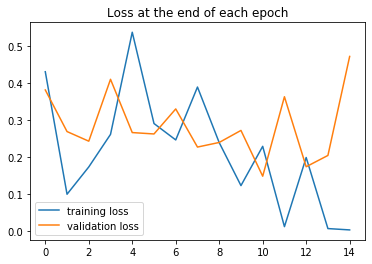

In [25]:
plt.plot(train_losses, label='training loss')
plt.plot(val_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();